**INITIALIZATION:**
- I use these three lines of code on top of my each notebooks because it will help to prevent any problems while reloading the same project. And the third line of code helps to make visualization within the notebook.

In [1]:
#@ INITIALIZATION: 
%reload_ext autoreload
%autoreload 2
%matplotlib inline

**DOWNLOADING LIBRARIES AND DEPENDENCIES:**
- I have downloaded all the libraries and dependencies required for the project in one particular cell.

In [2]:
#@ INSTALLING DEPENDENCIES: UNCOMMENT BELOW: 
# !pip install -Uqq fastbook
# import fastbook
# fastbook.setup_book()

     |████████████████████████████████| 727kB 7.5MB/s 
     |████████████████████████████████| 194kB 53.9MB/s 
     |████████████████████████████████| 51kB 8.2MB/s 
     |████████████████████████████████| 1.2MB 52.1MB/s 
     |████████████████████████████████| 61kB 10.3MB/s 
     |████████████████████████████████| 61kB 10.1MB/s 
Mounted at /content/gdrive


In [3]:
#@ DOWNLOADING LIBRARIES AND DEPENDENCIES: 
from fastai.vision.all import *                         # Getting all the Libraries. 
from fastbook import *                                  # Getting all the Libraries. 
matplotlib.rc("image", cmap="Greys")                    # Initializing Dependencies. 

**GETTING THE DATA:**
- I will download a sample of **MNIST**. 


In [4]:
#@ GETTING THE DATA: 
PATH = untar_data(URLs.MNIST_SAMPLE)                    # Path to the Dataset. 
PATH.ls()                                               # Inspecting Items. 

(#3) [Path('/root/.fastai/data/mnist_sample/labels.csv'),Path('/root/.fastai/data/mnist_sample/valid'),Path('/root/.fastai/data/mnist_sample/train')]

In [5]:
#@ INSPECTING THE TRAINING SET:  
(PATH/"train").ls()                                     # Inspecting Items. 

(#2) [Path('/root/.fastai/data/mnist_sample/train/7'),Path('/root/.fastai/data/mnist_sample/train/3')]

In [6]:
#@ INSPECTING THE FOLDERS: 
threes = (PATH/"train"/"3").ls().sorted()               # Getting Same Order of Items. 
sevens = (PATH/"train"/"7").ls().sorted()               # Getting Same Order of Items. 
threes                                                  # Inspecting Items. 

(#6131) [Path('/root/.fastai/data/mnist_sample/train/3/10.png'),Path('/root/.fastai/data/mnist_sample/train/3/10000.png'),Path('/root/.fastai/data/mnist_sample/train/3/10011.png'),Path('/root/.fastai/data/mnist_sample/train/3/10031.png'),Path('/root/.fastai/data/mnist_sample/train/3/10034.png'),Path('/root/.fastai/data/mnist_sample/train/3/10042.png'),Path('/root/.fastai/data/mnist_sample/train/3/10052.png'),Path('/root/.fastai/data/mnist_sample/train/3/1007.png'),Path('/root/.fastai/data/mnist_sample/train/3/10074.png'),Path('/root/.fastai/data/mnist_sample/train/3/10091.png')...]

In [7]:
#@ INSPECTING IMAGE: 
im3_path = threes[1]                                    # Path to the Image. 
im3 = Image.open(im3_path)                              # Getting an Image. 
im3

In [8]:
#@ CONVERTING INTO ARRAY: 
array(im3)[4:10, 4:10]                                  # Getting Numpy Array. 

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

In [9]:
#@ CONVERTING INTO ARRAY: 
tensor(im3)[4:10, 4:10]                                 # Getting a Tensor. 

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

In [10]:
#@ INSPECTING PIXELS: 
im3_t = tensor(im3)                                     # Getting a Tensor. 
df = pd.DataFrame(im3_t[4:15, 4:22])                    # Creating a DataFrame. 
df.style.set_properties(**{"font-size":"6pt"})\
        .background_gradient("Greys")                   # Inspecting the Image. 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


**PIXEL SIMILARITY:**
- I will get the average of pixel values for each groups of 3 and 7. I will create a tensor containing all the 3s stacked together. 

In [11]:
#@ GETTING TENSOR VALUES: 
seven_tensors = [tensor(Image.open(o)) for o in sevens]         # Initializing Tensor Values. 
three_tensors = [tensor(Image.open(o)) for o in threes]         # Initializing Tensor Values. 
len(three_tensors), len(seven_tensors)                          # Inspecting Number of Tensors. 

(6131, 6265)

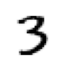

In [12]:
#@ INSPECTING A IMAGE: 
show_image(three_tensors[1]);                                   # Inspecting a Image. 

In [13]:
#@ GETTING STACKED TENSORS OF FLOATS: 
stacked_sevens = torch.stack(seven_tensors).float() / 255       # Getting Stacked Tensors. 
stacked_threes = torch.stack(three_tensors).float() / 255       # Getting Stacked Tesnors. 
stacked_threes.shape                                            # Inspecting Shape of Stack. 

torch.Size([6131, 28, 28])

In [14]:
#@ RANK OF TENSORS: 
len(stacked_threes.shape)                                       # Getting Rank of Tensor. 

3